This notebook contains an implementation of the cake eating problem; Goal is to deepen the understanding of some theory (fitted value function iteration as seen on https://python.quantecon.org/cake_eating_numerical.html)

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import numpy as np
from interpolation import interp
from scipy.optimize import minimize_scalar, bisect

In [24]:
def maximize(f, a, b, args):
    objective = lambda x: -f(x, *args)
    res = minimize_scalar(objective, bounds=(a,b), method="bounded")
    maximizer, maximum = res.x, -res.fun
    return maximizer, maximum

In [25]:
class CakeEating:
    def __init__(self, beta = 0.96, gamma = 1.5, x_grid_min=1e-3, x_grid_max=2.5, x_grid_size=120):
        self. beta = beta
        self.gamma = gamma
        self.x_grid = np.linspace(x_grid_min, x_grid_max, x_grid_size)

    def u(self, c):
        if self.gamma == 1:
            return np.log(c)
        else:
            return (c**(1-self.gamma)) / (1-self.gamma)

    def u_prime(self, c):
        return c ** -self.gamma

    def state_action_value(self, c, x, v_array):
        v = lambda x: interp(self.x_grid, v_array, x)
        return self.u(c) + self.beta * v(x-c)

In [26]:
def T(v, ce):
    v_new = np.empty_like(v)
    for i, x in enumerate(ce.x_grid):
        v_new[i] = maximize(ce.state_action_value, 1e-10, x, (x, v))[1]
    return v_new

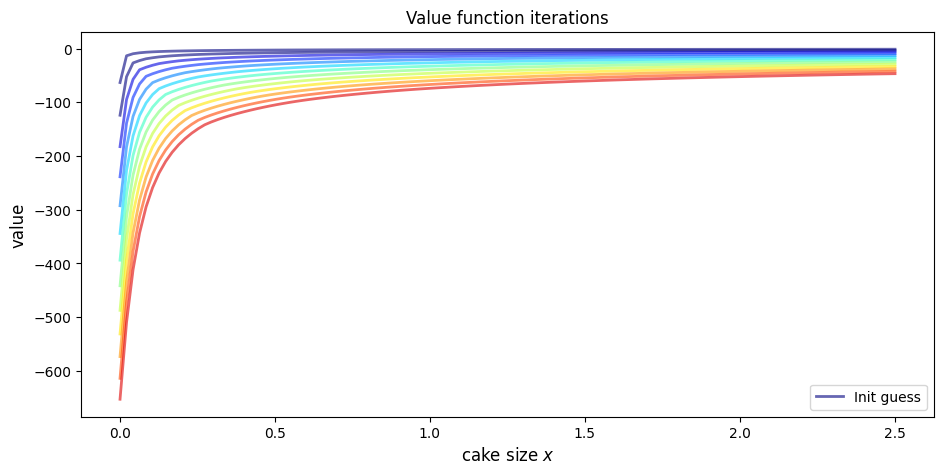

In [27]:
ce = CakeEating()
x_grid = ce.x_grid
v = ce.u(x_grid)
n = 12

fix, ax = plt.subplots()

ax.plot(x_grid, v, color=plt.cm.jet(0), lw=2, alpha=0.6, label="Init guess")

for i in range(n):
    v = T(v, ce)
    ax.plot(x_grid, v, color=plt.cm.jet(i / n), lw=2, alpha=0.6)

ax.legend()
ax.set_ylabel('value', fontsize=12)
ax.set_xlabel('cake size $x$', fontsize=12)
ax.set_title('Value function iterations')

plt.show()

In [30]:
def compute_value_function(ce, tol=1e-4, max_iter=1000, verbose=True, print_skip=25):
    v = ce.u(x_grid)
    i = 0
    error = 1

    while error > tol and i < max_iter:
        v_new = T(v, ce)
        error = max(np.abs(v - v_new))
        i+=1
        v = v_new

        if verbose and i%print_skip==0:
            print(f"Iteration {i},  error {error}")

    if error > tol:
        print("Failed to converge")
    else:
        print(f"Converged in {i} iterations")
    return v_new

In [31]:
v = compute_value_function(ce)

Iteration 25,  error 22.850646774716324
Iteration 50,  error 8.235298075690025
Iteration 75,  error 2.9679743888257235
Iteration 100,  error 1.0696482254516013
Iteration 125,  error 0.38549770864574384
Iteration 150,  error 0.138932108552126
Iteration 175,  error 0.05007067578844726
Iteration 200,  error 0.01804530716503905
Iteration 225,  error 0.00650346945712954
Iteration 250,  error 0.0023438290406829765
Iteration 275,  error 0.0008447082912539372
Iteration 300,  error 0.0003044300950136858
Iteration 325,  error 0.00010971560686812154
Converged in 328 iterations


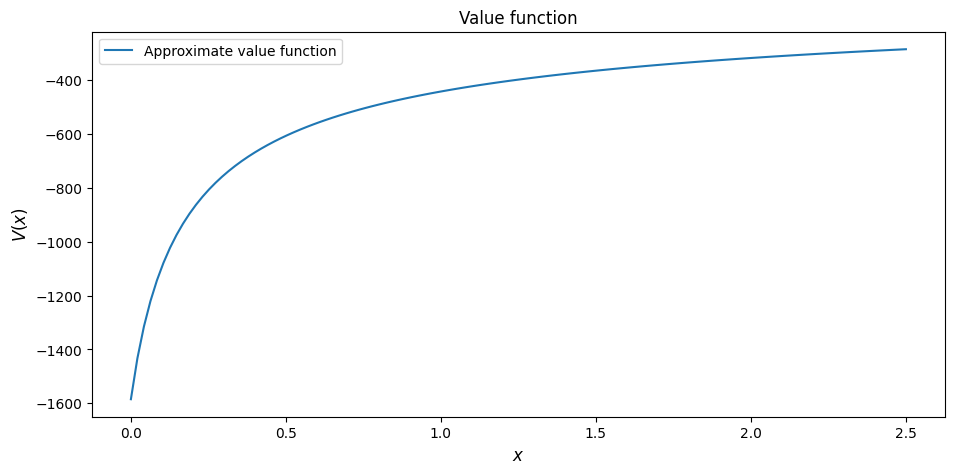

In [32]:
fig, ax = plt.subplots()

ax.plot(x_grid, v, label='Approximate value function')
ax.set_ylabel('$V(x)$', fontsize=12)
ax.set_xlabel('$x$', fontsize=12)
ax.set_title('Value function')
ax.legend()
plt.show()